# Data Cleaning and Preparation
This notebook contains the data cleaning and preparation steps for building a time series model to predict the world population.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as ydates

In [12]:
# Load the dataset
#file_path = '../data/processed/data_world.csv'
file_path = '../data/processed/data_world.csv'
data = pd.read_csv(file_path)
display(data.head())

,Year,AG.LND.AGRI.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,ER.H2O.INTR.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SE.ADT.LITR.ZS,SE.PRM.ENRL,...,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.1564.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL.IN.ZS
0,1960-01-01,NaN,NaN,NaN,NaN,NaN,1.364504e+12,450.106029,NaN,NaN,...,31.908511,17.234125,50.894331,4.695876,57.609554,74.564099,NaN,3.031517e+09,66.397484,33.602516
1,1961-01-01,35.879317,NaN,NaN,28.528475,13632.001963,1.439319e+12,468.456801,NaN,NaN,...,31.165497,14.583294,52.846477,4.575612,57.514766,74.847445,1.350895,3.072470e+09,65.910435,34.089565
2,1962-01-01,35.952470,NaN,NaN,29.033819,13395.564612,1.542845e+12,493.411159,NaN,NaN,...,35.103391,13.616499,55.208783,5.035190,57.396796,75.251960,1.771351,3.126894e+09,65.478880,34.521120
3,1963-01-01,36.035383,NaN,NaN,29.651986,13109.723539,1.664977e+12,521.369208,NaN,NaN,...,36.274663,13.459129,55.542430,5.323440,57.170929,76.020578,2.129136,3.193470e+09,65.102013,34.897987
4,1964-01-01,36.117043,NaN,NaN,30.274183,12834.164741,1.827785e+12,560.587725,NaN,NaN,...,35.131852,13.529275,56.034953,5.141431,56.978716,76.684358,2.098330,3.260480e+09,64.717882,35.282118


In [4]:
data.index


RangeIndex(start=0, stop=61, step=1)

### Convert 'Year' column to datetime format and set it as the index

In [5]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y-%m-%d')
data.set_index('Year', inplace=True)
data.head()

,AG.LND.AGRI.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,ER.H2O.INTR.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SE.ADT.LITR.ZS,SE.PRM.ENRL,SE.PRM.ENRL.TC.ZS,...,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.1564.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL.IN.ZS
Year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,NaN,NaN,NaN,NaN,NaN,1.364504e+12,450.106029,NaN,NaN,NaN,...,31.908511,17.234125,50.894331,4.695876,57.609554,74.564099,NaN,3.031517e+09,66.397484,33.602516
1961-01-01,35.879317,NaN,NaN,28.528475,13632.001963,1.439319e+12,468.456801,NaN,NaN,NaN,...,31.165497,14.583294,52.846477,4.575612,57.514766,74.847445,1.350895,3.072470e+09,65.910435,34.089565
1962-01-01,35.952470,NaN,NaN,29.033819,13395.564612,1.542845e+12,493.411159,NaN,NaN,NaN,...,35.103391,13.616499,55.208783,5.035190,57.396796,75.251960,1.771351,3.126894e+09,65.478880,34.521120
1963-01-01,36.035383,NaN,NaN,29.651986,13109.723539,1.664977e+12,521.369208,NaN,NaN,NaN,...,36.274663,13.459129,55.542430,5.323440,57.170929,76.020578,2.129136,3.193470e+09,65.102013,34.897987
1964-01-01,36.117043,NaN,NaN,30.274183,12834.164741,1.827785e+12,560.587725,NaN,NaN,NaN,...,35.131852,13.529275,56.034953,5.141431,56.978716,76.684358,2.098330,3.260480e+09,64.717882,35.282118


### Fill missing values with forward fill method

In [6]:
data.describe()

,AG.LND.AGRI.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,ER.H2O.INTR.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SE.ADT.LITR.ZS,SE.PRM.ENRL,SE.PRM.ENRL.TC.ZS,...,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.1564.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL.IN.ZS
count,60.000000,21.000000,23.000000,60.000000,60.000000,6.100000e+01,61.000000,45.000000,5.100000e+01,49.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,60.000000,6.100000e+01,61.000000,61.000000
mean,37.194392,58.462526,83.256583,44.737201,8479.799283,3.023342e+13,4730.546782,77.959178,6.071506e+08,26.261916,...,25.664130,9.905745,64.490771,3.443660,60.981538,65.815167,1.592716,5.325349e+09,56.314292,43.685708
std,0.719425,7.037318,4.767099,8.682935,2314.456588,2.801190e+13,3614.792409,6.748948,9.615138e+07,1.675390,...,5.249030,2.141791,5.729148,0.925490,3.146621,8.344295,0.332218,1.451511e+09,6.643229,6.643229
min,35.879317,49.296068,73.351057,28.528475,5499.282171,1.364504e+12,450.106029,65.586548,4.016588e+08,23.105960,...,17.225600,7.472199,50.894331,2.299689,56.832243,54.664765,1.014463,3.031517e+09,43.935269,33.602516
25%,36.782450,52.338751,80.076085,38.300670,6585.326795,5.990674e+12,1471.888359,72.048683,5.422801e+08,25.141940,...,20.611341,8.153805,60.166149,2.603162,57.514766,56.923882,1.261807,4.070060e+09,50.911960,37.649413
50%,37.031944,57.282430,82.984304,45.282562,7856.359527,2.282261e+13,4311.441716,80.433929,6.191992e+08,26.297110,...,26.052895,9.261374,65.188507,3.305448,60.975415,65.561399,1.656012,5.293498e+09,56.996091,43.003909
75%,37.502460,63.857095,86.662527,50.659828,10058.352121,4.776032e+13,7288.550579,83.513199,6.913795e+08,27.800120,...,29.115369,11.307202,69.198812,4.079910,64.395352,74.847445,1.790270,6.552787e+09,62.350587,49.088040
max,38.973290,71.279020,90.485404,60.191714,13632.001963,8.794557e+13,11358.478658,86.711510,7.511644e+08,28.730860,...,36.274663,17.234125,72.979020,5.323440,65.334837,77.206540,2.129136,7.821272e+09,66.397484,56.064731


In [7]:
missing_values = data.isnull().mean()
print(missing_values)

# Step 2: Filter out columns with more than 90 missing values
columns_to_keep = missing_values[missing_values <= 0.9].index

# Step 3: Create a new DataFrame with the filtered columns
filtered_df = data[columns_to_keep]

# Display the shape of the new DataFrame
print(filtered_df.shape)

AG.LND.AGRI.ZS       0.016393
EG.CFT.ACCS.ZS       0.655738
EG.ELC.ACCS.ZS       0.622951
EN.POP.DNST          0.016393
ER.H2O.INTR.PC       0.016393
NY.GDP.MKTP.CD       0.000000
NY.GDP.PCAP.CD       0.000000
SE.ADT.LITR.ZS       0.262295
SE.PRM.ENRL          0.163934
SE.PRM.ENRL.TC.ZS    0.196721
SE.PRM.ENRR          0.163934
SH.DYN.MORT          0.491803
SH.XPD.CHEX.GD.ZS    0.655738
SH.XPD.CHEX.PC.CD    0.655738
SI.POV.DDAY          0.344262
SL.UEM.TOTL.ZS       0.508197
SP.DYN.CBRT.IN       0.000000
SP.DYN.CDRT.IN       0.000000
SP.DYN.LE00.IN       0.000000
SP.DYN.TFRT.IN       0.000000
SP.POP.1564.TO.ZS    0.000000
SP.POP.DPND          0.000000
SP.POP.GROW          0.016393
SP.POP.TOTL          0.000000
SP.RUR.TOTL.ZS       0.000000
SP.URB.TOTL.IN.ZS    0.000000
dtype: float64
(61, 26)


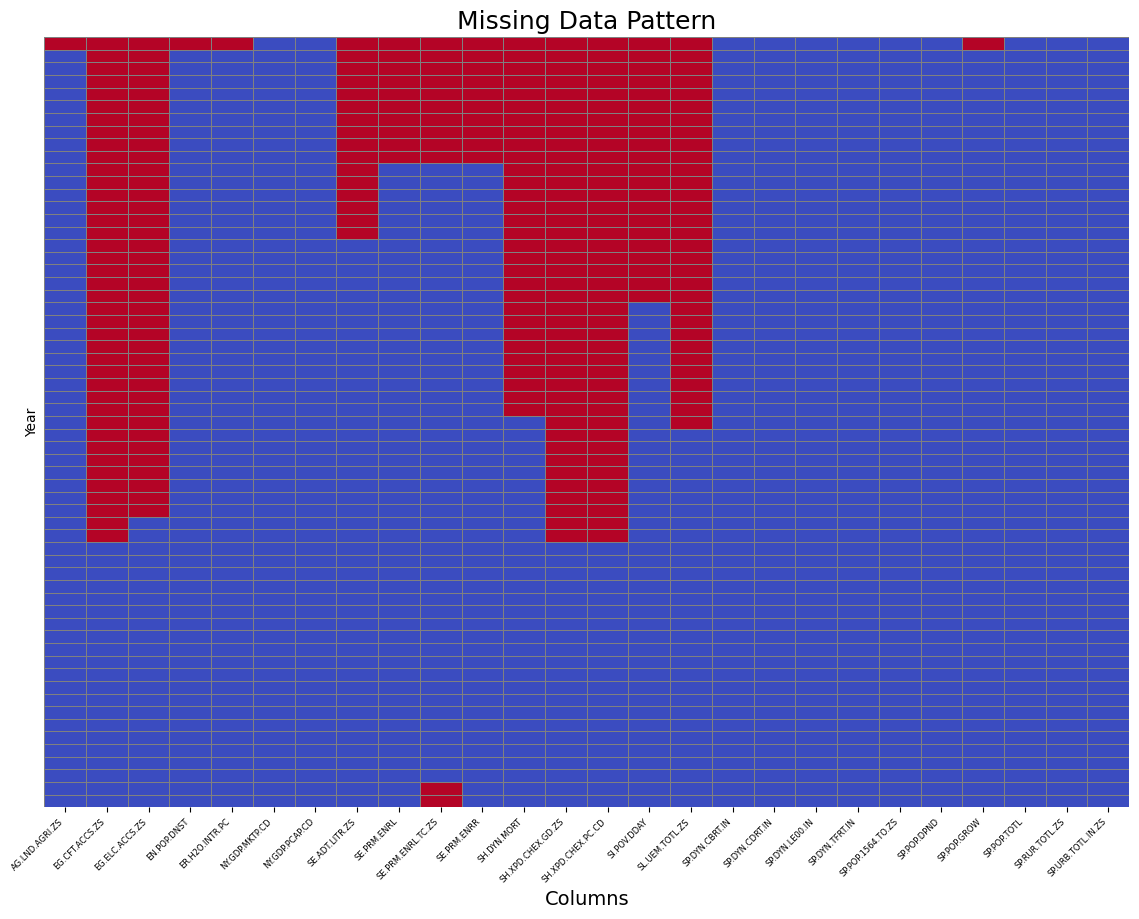

In [8]:
# Visualize the pattern of missing data
plt.figure(figsize=(14, 10))

heatmap = sns.heatmap(
        data.isnull(),
        cbar=False,  # Add color bar
        cmap='coolwarm',  # Use a different color palette for better contrast
        yticklabels=False,
        xticklabels=True,
        linewidths=.5,  # Add gridlines
        linecolor='gray'
)
# Adding titles and labels
plt.title('Missing Data Pattern', fontsize=18)
plt.xlabel('Columns', fontsize=14)


# Adjusting the tick parameters for better readability
#plt.FuncFormatter(lambda y, pos: pd.to_datetime(y).year)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()

In [9]:
# Analyze the missing data pattern more thoroughly
missing_data_summary = data.isnull().sum().reset_index()
missing_data_summary.columns = ['Column', 'Missing Values']
missing_data_summary['Percentage'] = (missing_data_summary['Missing Values'] / data.shape[0]) * 100

missing_data_summary

,Column,Missing Values,Percentage
0,AG.LND.AGRI.ZS,1,1.639344
1,EG.CFT.ACCS.ZS,40,65.573770
2,EG.ELC.ACCS.ZS,38,62.295082
3,EN.POP.DNST,1,1.639344
4,ER.H2O.INTR.PC,1,1.639344
5,NY.GDP.MKTP.CD,0,0.000000
6,NY.GDP.PCAP.CD,0,0.000000
7,SE.ADT.LITR.ZS,16,26.229508
8,SE.PRM.ENRL,10,16.393443
9,SE.PRM.ENRL.TC.ZS,12,19.672131


In [10]:
# Apply linear interpolation to handle missing values
data_interpolated = data.interpolate(method='linear', limit_direction='both')

# Evaluate remaining missing values
remaining_missing_values = data_interpolated.isnull().sum()

# For columns that still have missing values, use mean/median imputation or forward/backward fill
data_imputed = data_interpolated.fillna(data_interpolated.mean())

# Verify the imputation results
remaining_missing_values_after_imputation = data_imputed.isnull().sum()
remaining_missing_values_after_imputation

AG.LND.AGRI.ZS       0
EG.CFT.ACCS.ZS       0
EG.ELC.ACCS.ZS       0
EN.POP.DNST          0
ER.H2O.INTR.PC       0
NY.GDP.MKTP.CD       0
NY.GDP.PCAP.CD       0
SE.ADT.LITR.ZS       0
SE.PRM.ENRL          0
SE.PRM.ENRL.TC.ZS    0
SE.PRM.ENRR          0
SH.DYN.MORT          0
SH.XPD.CHEX.GD.ZS    0
SH.XPD.CHEX.PC.CD    0
SI.POV.DDAY          0
SL.UEM.TOTL.ZS       0
SP.DYN.CBRT.IN       0
SP.DYN.CDRT.IN       0
SP.DYN.LE00.IN       0
SP.DYN.TFRT.IN       0
SP.POP.1564.TO.ZS    0
SP.POP.DPND          0
SP.POP.GROW          0
SP.POP.TOTL          0
SP.RUR.TOTL.ZS       0
SP.URB.TOTL.IN.ZS    0
dtype: int64

In [11]:
data_imputed.to_csv('../data/processed/data_world_imputed.csv')
print('DF data_world_imputed was saved in data_world_imputed.csv')

DF data_world_imputed was saved in data_world_imputed.csv
